In [1]:
import torch
try:
    print("Total # of GPUs available:", torch.cuda.device_count())
    print("Using: GPU#", torch.cuda.current_device())
except:
    print("Using: CPU")

Total # of GPUs available: 3
Using: GPU# 0


In [5]:
import numpy as np
from torchsummary import summary
from MobileNetV2 import MobileNetV2

In [6]:
input_channels = 3
input_size = 64
net = MobileNetV2(n_class=1000, input_size=input_size, color_chanels=input_channels, width_mult=1.).cuda()
state_dict = torch.load('mobilenet_v2.pth.tar') # add map_location='cpu' if no gpu
net.load_state_dict(state_dict)
image = np.zeros((1, input_channels, input_size, input_size))
image = torch.tensor(image).float().cuda()
print(net(image).shape)
summary(net, input_size=(input_channels, input_size, input_size))

torch.Size([1, 1000])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
             ReLU6-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]             288
       BatchNorm2d-5           [-1, 32, 32, 32]              64
             ReLU6-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]             512
       BatchNorm2d-8           [-1, 16, 32, 32]              32
  InvertedResidual-9           [-1, 16, 32, 32]               0
           Conv2d-10           [-1, 96, 32, 32]           1,536
      BatchNorm2d-11           [-1, 96, 32, 32]             192
            ReLU6-12           [-1, 96, 32, 32]               0
           Conv2d-13           [-1, 96, 16, 16]             864
      BatchNorm2d

In [7]:
input_channels = 3
input_size = 128
net = MobileNetV2(n_class=1000, input_size=input_size, color_chanels=input_channels, width_mult=1.).cuda()
state_dict = torch.load('mobilenet_v2.pth.tar') # add map_location='cpu' if no gpu
net.load_state_dict(state_dict)
image = np.zeros((1, input_channels, input_size, input_size))
image = torch.tensor(image).float().cuda()
print(net(image).shape)
summary(net, input_size=(input_channels, input_size, input_size))

torch.Size([1, 1000])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             864
       BatchNorm2d-2           [-1, 32, 64, 64]              64
             ReLU6-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 32, 64, 64]             288
       BatchNorm2d-5           [-1, 32, 64, 64]              64
             ReLU6-6           [-1, 32, 64, 64]               0
            Conv2d-7           [-1, 16, 64, 64]             512
       BatchNorm2d-8           [-1, 16, 64, 64]              32
  InvertedResidual-9           [-1, 16, 64, 64]               0
           Conv2d-10           [-1, 96, 64, 64]           1,536
      BatchNorm2d-11           [-1, 96, 64, 64]             192
            ReLU6-12           [-1, 96, 64, 64]               0
           Conv2d-13           [-1, 96, 32, 32]             864
      BatchNorm2d

In [8]:
input_channels = 3
input_size = 224
net = MobileNetV2(n_class=1000, input_size=input_size, color_chanels=input_channels, width_mult=1.).cuda()
state_dict = torch.load('mobilenet_v2.pth.tar') # add map_location='cpu' if no gpu
net.load_state_dict(state_dict)
image = np.zeros((1, input_channels, input_size, input_size))
image = torch.tensor(image).float().cuda()
print(net(image).shape)
summary(net, input_size=(input_channels, input_size, input_size))

torch.Size([1, 1000])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d

In [9]:
from torch.autograd import Variable
from torchviz import make_dot
# Make sure you have GraphViz installed
# sudo apt install python-pydot python-pydot-ng graphviz

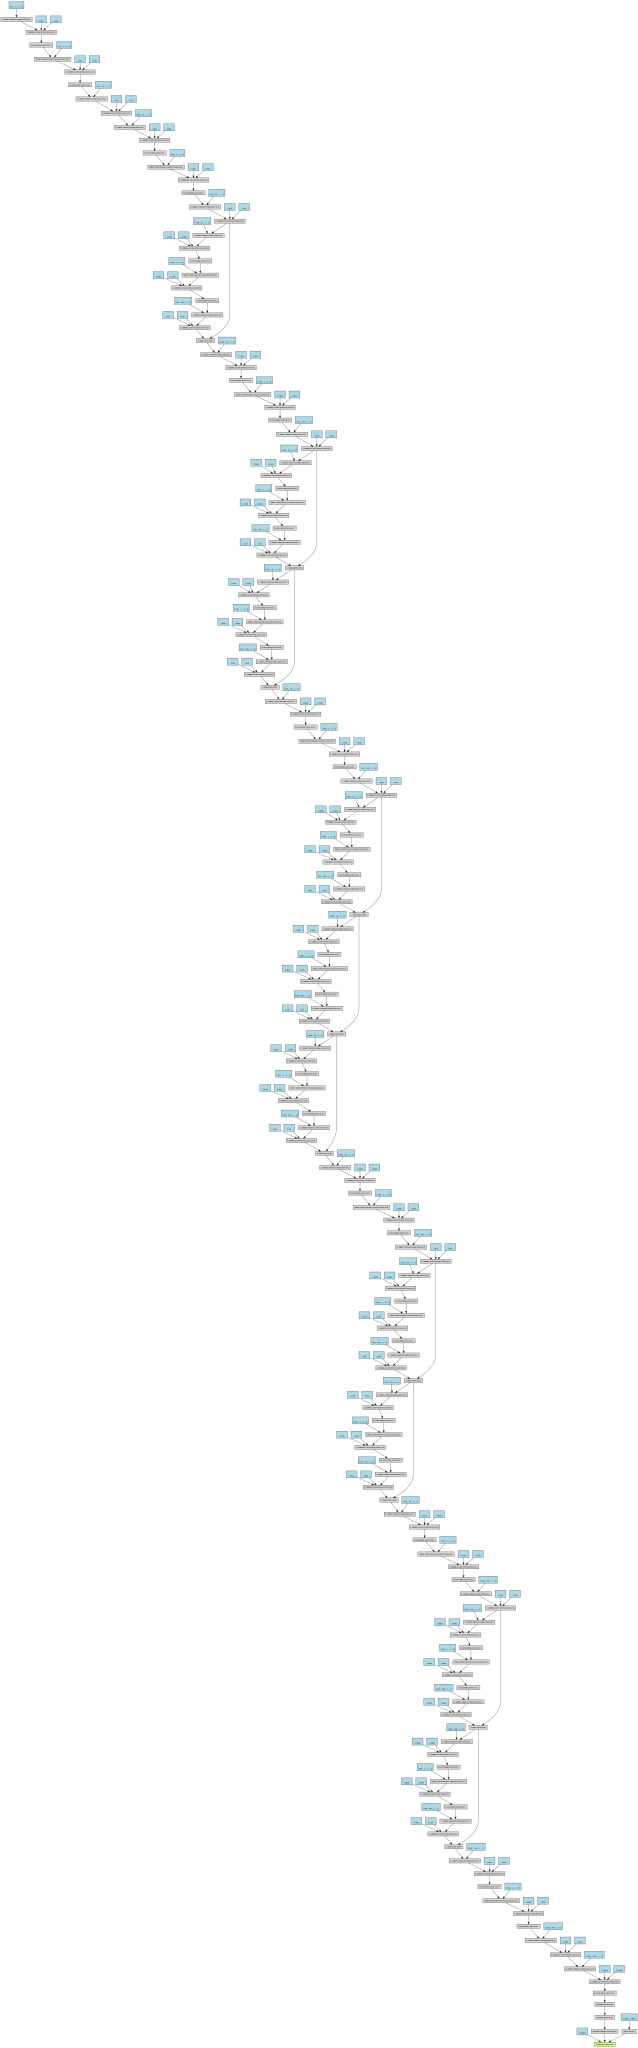

In [10]:
y = net(Variable(image))
g = make_dot(y)
g